In [1]:
import numpy as np
import matplotlib.pyplot as plt
import condensed_workplace_model

In [2]:
# Experiment parameters to run with
workplace_condensation = np.arange(0.0, 1.0, 0.05)

In [3]:
final_total_infected = []
peak_infected = []
for c in workplace_condensation:
    params = condensed_workplace_model.get_default_params()
    params['condensation_work'] = c
    
    sim_results = condensed_workplace_model.run_simulation(params)
    
    final_total_infected.append(sim_results['total_ever_infected_vs_t'][-1])
    peak_infected.append(max(sim_results['infected_vs_t']))
    
    print(f'Finished sim with c = {c}')

Finished sim with c = 0.0
Finished sim with c = 0.05
Finished sim with c = 0.1
Finished sim with c = 0.15000000000000002
Finished sim with c = 0.2
Finished sim with c = 0.25
Finished sim with c = 0.30000000000000004
Finished sim with c = 0.35000000000000003
Finished sim with c = 0.4
Finished sim with c = 0.45
Finished sim with c = 0.5
Finished sim with c = 0.55
Finished sim with c = 0.6000000000000001
Finished sim with c = 0.65
Finished sim with c = 0.7000000000000001
Finished sim with c = 0.75
Finished sim with c = 0.8
Finished sim with c = 0.8500000000000001
Finished sim with c = 0.9
Finished sim with c = 0.9500000000000001


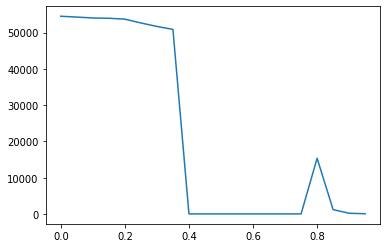

In [11]:
plt.plot(workplace_condensation, [x[-1] for x in final_total_infected])

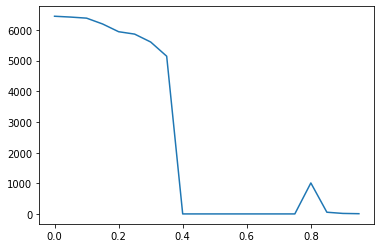

In [8]:
plt.plot(workplace_condensation, peak_infected)

# Estimating R(t)

From my sim output I see how many people have the disease each day, and the total number who have ever been infected.
I can estimate R(t) by:
```
num people newly infected today  /  num people who recovered today
```
i.e.
```
(total_ever_infected[t] - total_ever_infected[t - 1]) /  (recoved[t] - recovered[t - 1])
```

In [16]:
sim_result = condensed_workplace_model.run_simulation(condensed_workplace_model.get_default_params())

In [17]:
recovered = sim_result['recovered_vs_t']
total_ever_infected = sim_result['total_ever_infected_vs_t']

This reveals a big problem with my naive method - the replication number is often `nan` or `inf`, particularly at the start the epidemic.

Plotting reveals a mess.

In [21]:
R_t = [(total_ever_infected[t] - total_ever_infected[t-1]) / (recovered[t] - recovered[t-1]) for t in range(1, len(recovered))]

/home/harry/anaconda3/envs/data_science/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in long_scalars
  """Entry point for launching an IPython kernel.
/home/harry/anaconda3/envs/data_science/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in long_scalars
  """Entry point for launching an IPython kernel.


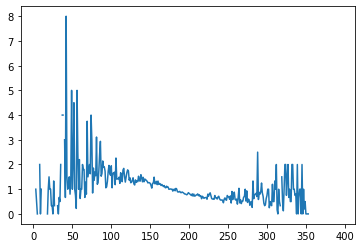

In [28]:
plt.plot(R_t)
plt.show()

Maybe a better idea is to take a plot of the y = new infection vs x = recoveries, and focus on a slice early in the epidemic.

Use this to estimate the value of R_0.

Estimated R_0 as 1.514


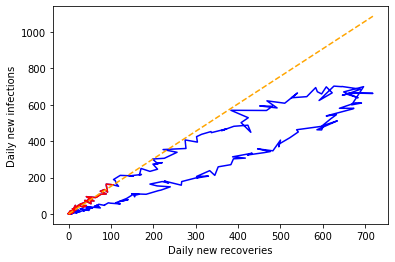

In [54]:
frac_to_use = 0.3

new_infections = [total_ever_infected[t] - total_ever_infected[t-1] for t in range(1, len(recovered))]
new_recoveries = [recovered[t] - recovered[t-1] for t in range(1, len(recovered))]

num_to_use = int(frac_to_use*len(new_recoveries))

cov_mat = np.cov(new_recoveries[:num_to_use], new_infections[:num_to_use])
grad = cov_mat[0, 1] / cov_mat[0, 0]

print(f'Estimated R_0 as {grad:.3f}')

plt.plot(new_recoveries, new_infections, 'b-')
plt.plot(new_recoveries[:num_to_use], new_infections[:num_to_use], 'r-')
plt.plot([0, max(new_recoveries)], [0, grad*max(new_recoveries)], '--', color='orange')
plt.ylabel('Daily new infections')
plt.xlabel('Daily new recoveries')
plt.show()